In [1]:
!pip install opencv-python matplotlib
import cv2
import matplotlib.pyplot as plt


In [2]:
# Haar Cascade classifier load karna (face detection ke liye pre-trained XML file)
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")


Saving 1.jpg to 1.jpg


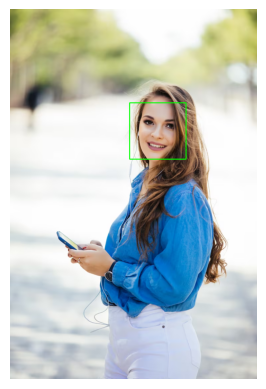

Faces detected: 1


In [3]:
from google.colab import files
uploaded = files.upload()   # Apna image upload karo (.jpg / .png)

# Uploaded image ka naam check karo
for fn in uploaded.keys():
    filename = fn

# Image load
img = cv2.imread(filename)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Draw bounding boxes
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("Faces detected:", len(faces))


In [4]:
from google.colab import files
uploaded = files.upload()   # yahan apna sample_video.mp4 upload karo


Saving video.mp4 to video.mp4


In [5]:
!wget https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml


--2025-10-03 12:04:31--  https://github.com/opencv/opencv/raw/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml [following]
--2025-10-03 12:04:32--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.03s   

2025

In [6]:
import cv2


In [7]:
from google.colab import files
uploaded = files.upload()   # yahan apna sample_video.mp4 upload karo


Saving video.mp4 to video (1).mp4


In [8]:
# Input video ka naam (aap apna video path yahan de sakte ho)
input_video = "video.mp4"   # apna video upload kar lena

# Output video ka naam
output_video = "output.mp4"

# Haar cascade load karo
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

# Video capture object banao
cap = cv2.VideoCapture(input_video)

# Check karo file load hui ya nahi
if not cap.isOpened():
    print("❌ Error: Video file not found or could not be opened.")
else:
    # Video ke properties
    fourcc = cv2.VideoWriter_fourcc(*'mp4v')
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    # Output writer
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    # Har frame par loop
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert to gray
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Detect faces
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        # Draw rectangle around faces
        for (x, y, w, h) in faces:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

        # Write frame in output
        out.write(frame)

    cap.release()
    out.release()
    print("✅ Face Detection Video saved as", output_video)


✅ Face Detection Video saved as output.mp4


In [9]:
!ffmpeg -i output.mp4 -vcodec libx264 processed_output.mp4 -y


ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [10]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('processed_output.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()

HTML(f"""
<video width=400 controls>
      <source src="{data_url}" type="video/mp4">
</video>
""")


In [11]:
from google.colab import files
files.download("processed_output.mp4")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>